# Loan Approval Classification - Machine Learning Project

**Objective:** Build and evaluate predictive models to classify loan approval status based on applicant information.

**Dataset:** Loan Approval Classification Data  
**Target Variable:** `loan_status` (1 = Approved, 0 = Rejected)

**Project Structure:**
1. Data Loading and Initial Exploration
2. Data Preprocessing
3. Exploratory Data Analysis (EDA)
4. Feature Engineering
5. Model Building and Training
6. Model Evaluation
7. Hyperparameter Tuning
8. Final Model Selection and Conclusions

## Step 1: Import Required Libraries

Import all necessary libraries for data manipulation, visualization, and machine learning.

In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


## Step 2: Load the Dataset

Load the loan approval dataset and perform initial inspection.

In [3]:
# Load the dataset
df = pd.read_csv('loan_data.csv')

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Dataset loaded successfully!
Dataset shape: (45000, 14)
Number of rows: 45000
Number of columns: 14


## Step 3: Initial Data Exploration

Examine the structure, data types, and basic statistics of the dataset.

In [4]:
# Display first few rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [5]:
# Display dataset information
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_lo

In [6]:
# Display column names
print("Column names:")
print(df.columns.tolist())

Column names:
['person_age', 'person_gender', 'person_education', 'person_income', 'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'previous_loan_defaults_on_file', 'loan_status']


In [7]:
# Display statistical summary
print("Statistical Summary:")
df.describe()

Statistical Summary:


,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [8]:
# Check for missing values
print("Missing Values:")
missing_values = df.isnull().sum()
print(missing_values)
print(f"\nTotal missing values: {missing_values.sum()}")

Missing Values:
person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

Total missing values: 0
person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_l

In [9]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


## Step 4: Data Preprocessing

### 4.1: Check Target Variable Distribution

Target Variable Distribution:
loan_status
0    35000
1    10000
Name: count, dtype: int64

Percentage Distribution:
loan_status
0    77.777778
1    22.222222
Name: proportion, dtype: float64


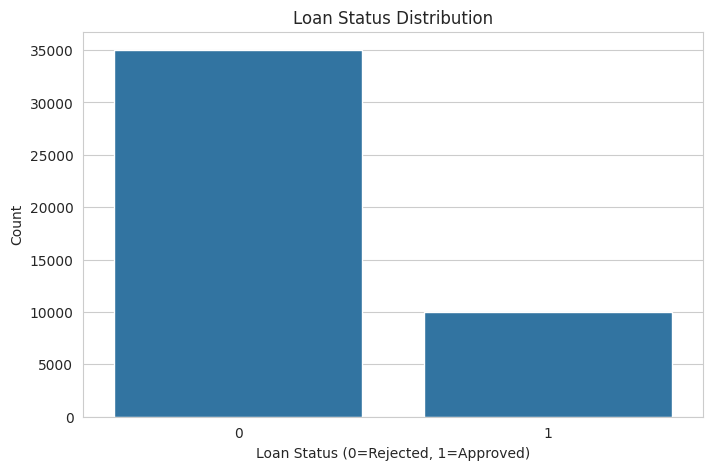

In [10]:
# Check target variable distribution
print("Target Variable Distribution:")
print(df['loan_status'].value_counts())
print("\nPercentage Distribution:")
print(df['loan_status'].value_counts(normalize=True) * 100)

# Visualize target distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='loan_status')
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status (0=Rejected, 1=Approved)')
plt.ylabel('Count')
plt.show()

### 4.2: Handle Categorical Variables

Encode categorical variables into numerical format for machine learning models.

In [11]:
# Create a copy of the dataframe
df_processed = df.copy()

# Display unique values for categorical columns
categorical_cols = df_processed.select_dtypes(include=['object']).columns
print("Categorical columns and their unique values:")
for col in categorical_cols:
    print(f"\n{col}:")
    print(df_processed[col].value_counts())

Categorical columns and their unique values:

person_gender:
person_gender
male      24841
female    20159
Name: count, dtype: int64

person_education:
person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64

person_home_ownership:
person_home_ownership
RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: count, dtype: int64

loan_intent:
loan_intent
EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64

previous_loan_defaults_on_file:
previous_loan_defaults_on_file
Yes    22858
No     22142
Name: count, dtype: int64


person_gender:
person_gender
male      24841
female    20159
Name: count, dtype: int64

person_education:
person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Na

In [12]:
# Binary encoding for person_gender
print("Encoding person_gender...")
df_processed['person_gender'] = df_processed['person_gender'].map({'male': 0, 'female': 1})
print("person_gender encoded: male=0, female=1")
print(df_processed['person_gender'].value_counts())

Encoding person_gender...
person_gender encoded: male=0, female=1
person_gender
0    24841
1    20159
Name: count, dtype: int64


In [13]:
# Binary encoding for previous_loan_defaults_on_file
print("Encoding previous_loan_defaults_on_file...")
df_processed['previous_loan_defaults_on_file'] = df_processed['previous_loan_defaults_on_file'].map({'No': 0, 'Yes': 1})
print("previous_loan_defaults_on_file encoded: No=0, Yes=1")
print(df_processed['previous_loan_defaults_on_file'].value_counts())

Encoding previous_loan_defaults_on_file...
previous_loan_defaults_on_file encoded: No=0, Yes=1
previous_loan_defaults_on_file
1    22858
0    22142
Name: count, dtype: int64


In [14]:
# Check remaining categorical columns (to be one-hot encoded later)
categorical_remaining = df_processed.select_dtypes(include=['object']).columns.tolist()
print(f"Remaining categorical columns for one-hot encoding: {categorical_remaining}")

Remaining categorical columns for one-hot encoding: ['person_education', 'person_home_ownership', 'loan_intent']


## Step 5: Exploratory Data Analysis (EDA)

### 5.1: Numerical Features Distribution

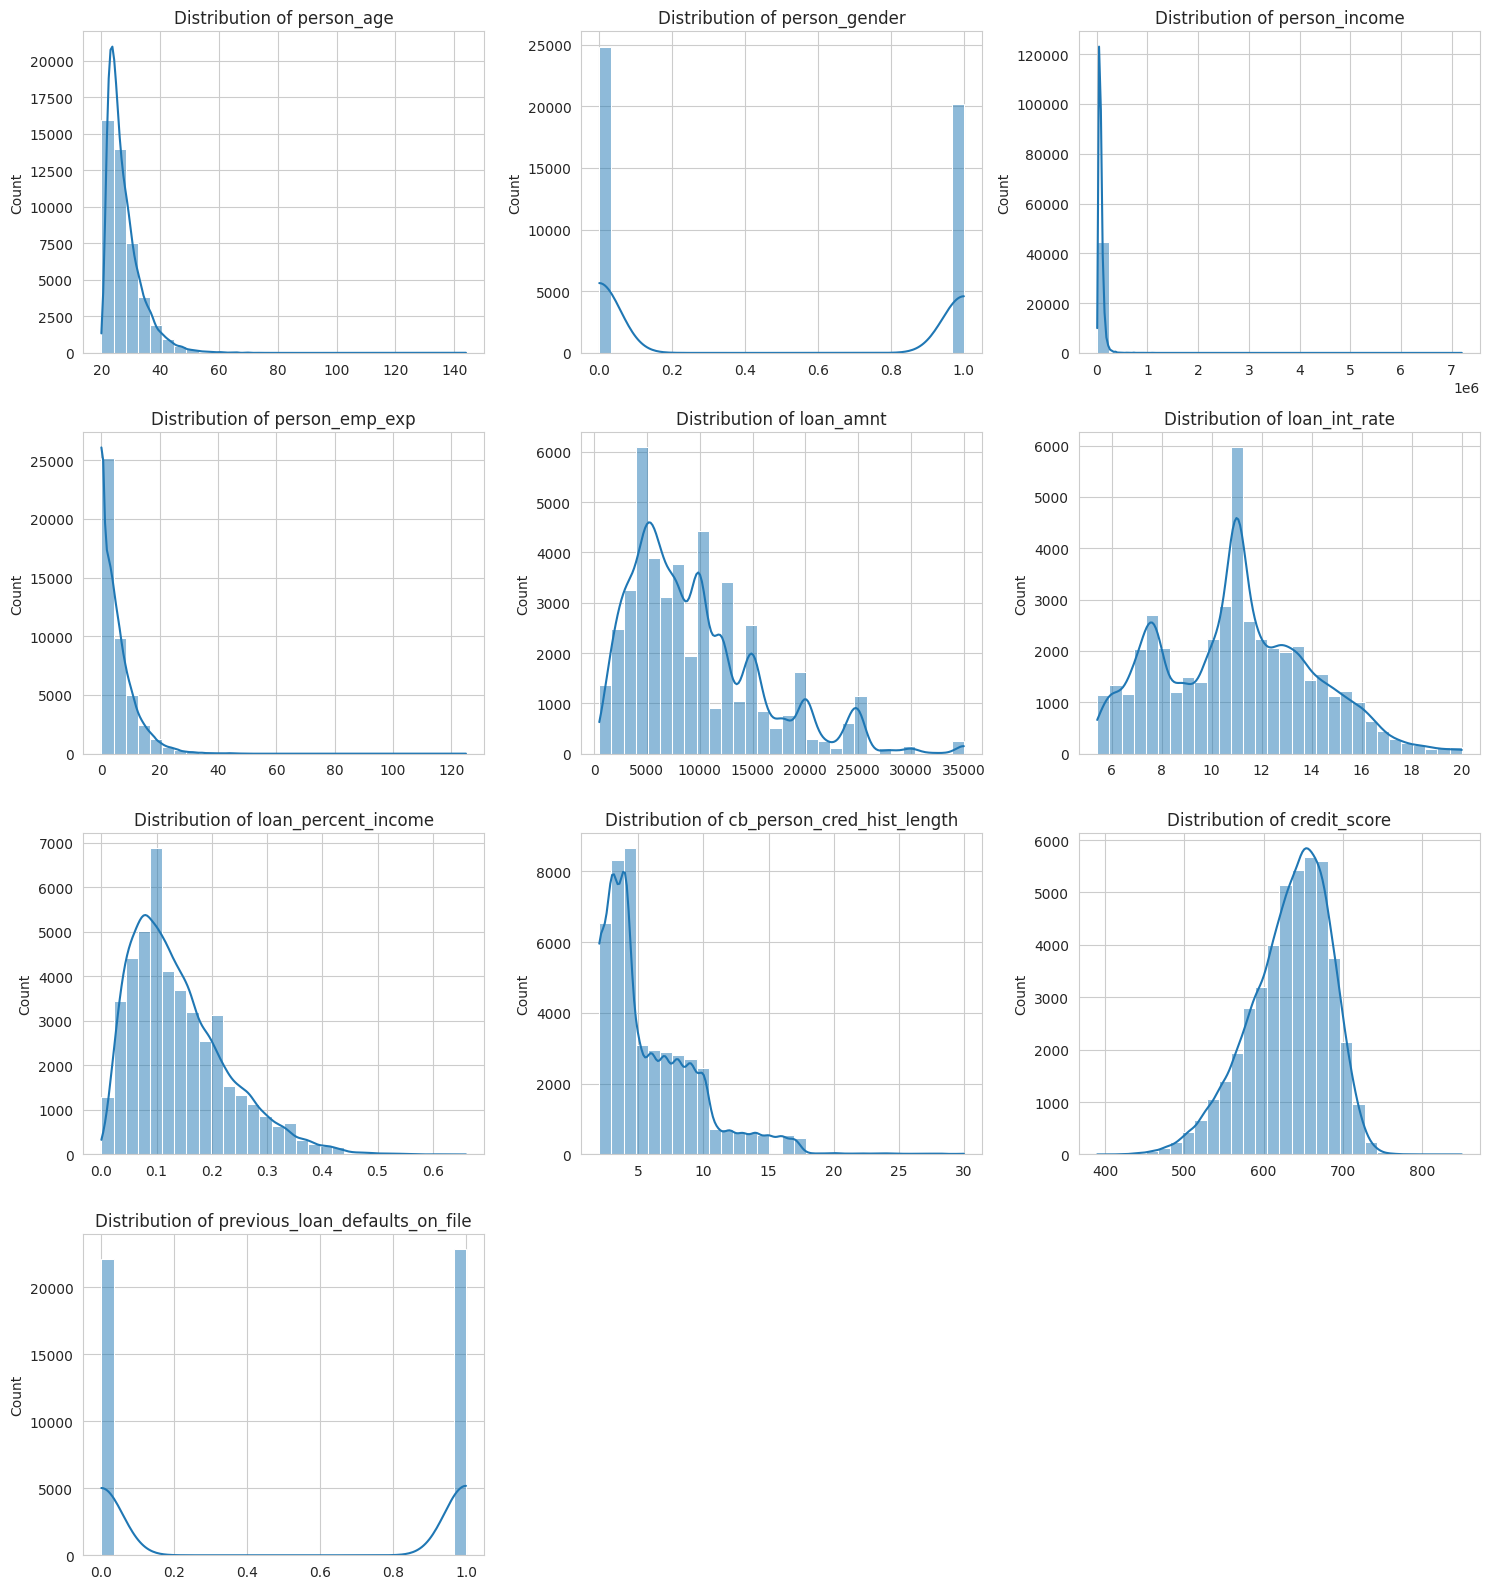

In [15]:
# Distribution of numerical features
numerical_cols = df_processed.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols.remove('loan_status')  # Remove target variable

n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    sns.histplot(df_processed[col], kde=True, bins=30, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel('')

# Hide extra subplots
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

### 5.2: Correlation Analysis

In [16]:
# Correlation matrix
print("Correlation Matrix:")
correlation_matrix = df_processed.corr(numeric_only=True)
print(correlation_matrix)

Correlation Matrix:
                                person_age  person_gender  person_income  \
person_age                        1.000000      -0.017528       0.193698   
person_gender                    -0.017528       1.000000      -0.010173   
person_income                     0.193698      -0.010173       1.000000   
person_emp_exp                    0.954412      -0.015078       0.185987   
loan_amnt                         0.050750      -0.010647       0.242290   
loan_int_rate                     0.013402      -0.003662       0.001510   
loan_percent_income              -0.043299       0.000367      -0.234177   
cb_person_cred_hist_length        0.861985      -0.011999       0.124316   
credit_score                      0.178432       0.000223       0.035919   
previous_loan_defaults_on_file   -0.025917      -0.000704       0.061483   
loan_status                      -0.021476       0.000561      -0.135808   

                                person_emp_exp  loan_amnt  loan_int

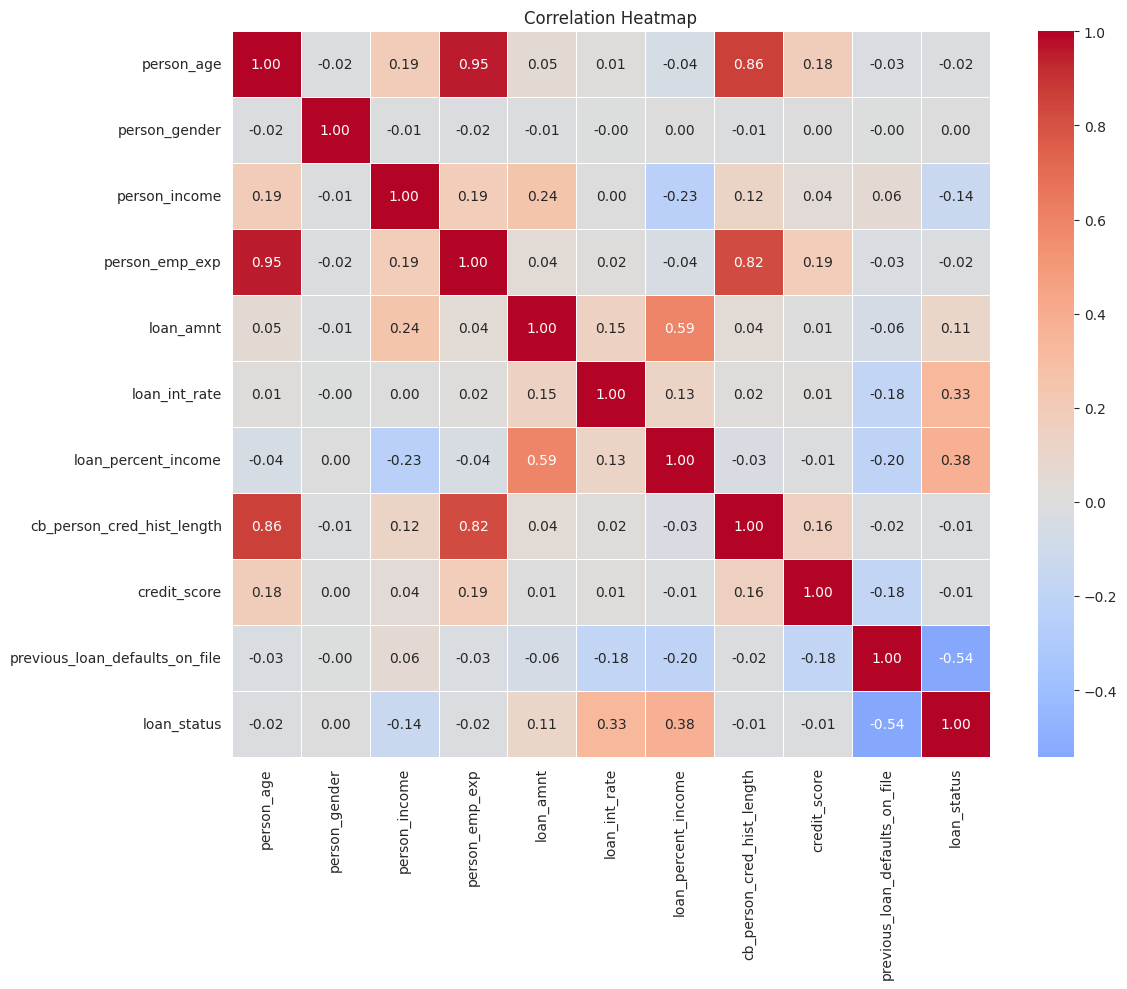

In [17]:
# Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

Correlation with Target Variable (loan_status):
loan_status                       1.000000
loan_percent_income               0.384880
loan_int_rate                     0.332005
loan_amnt                         0.107714
person_gender                     0.000561
credit_score                     -0.007647
cb_person_cred_hist_length       -0.014851
person_emp_exp                   -0.020481
person_age                       -0.021476
person_income                    -0.135808
previous_loan_defaults_on_file   -0.543096
Name: loan_status, dtype: float64


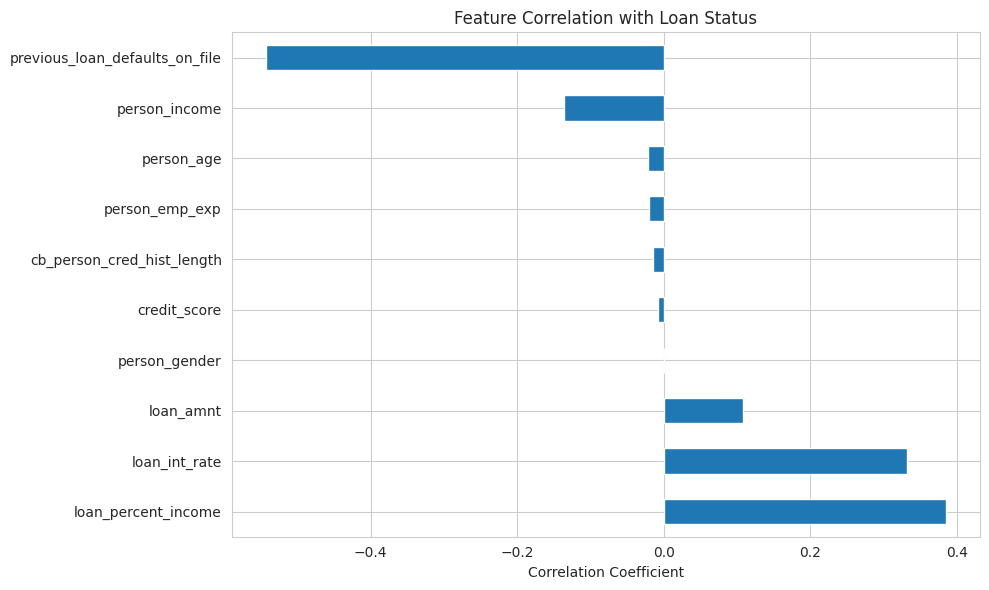

In [18]:
# Correlation with target variable
target_corr = correlation_matrix['loan_status'].sort_values(ascending=False)
print("Correlation with Target Variable (loan_status):")
print(target_corr)

# Visualize
plt.figure(figsize=(10, 6))
target_corr.drop('loan_status').plot(kind='barh')
plt.title('Feature Correlation with Loan Status')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

### 5.3: Relationship Between Features and Target Variable

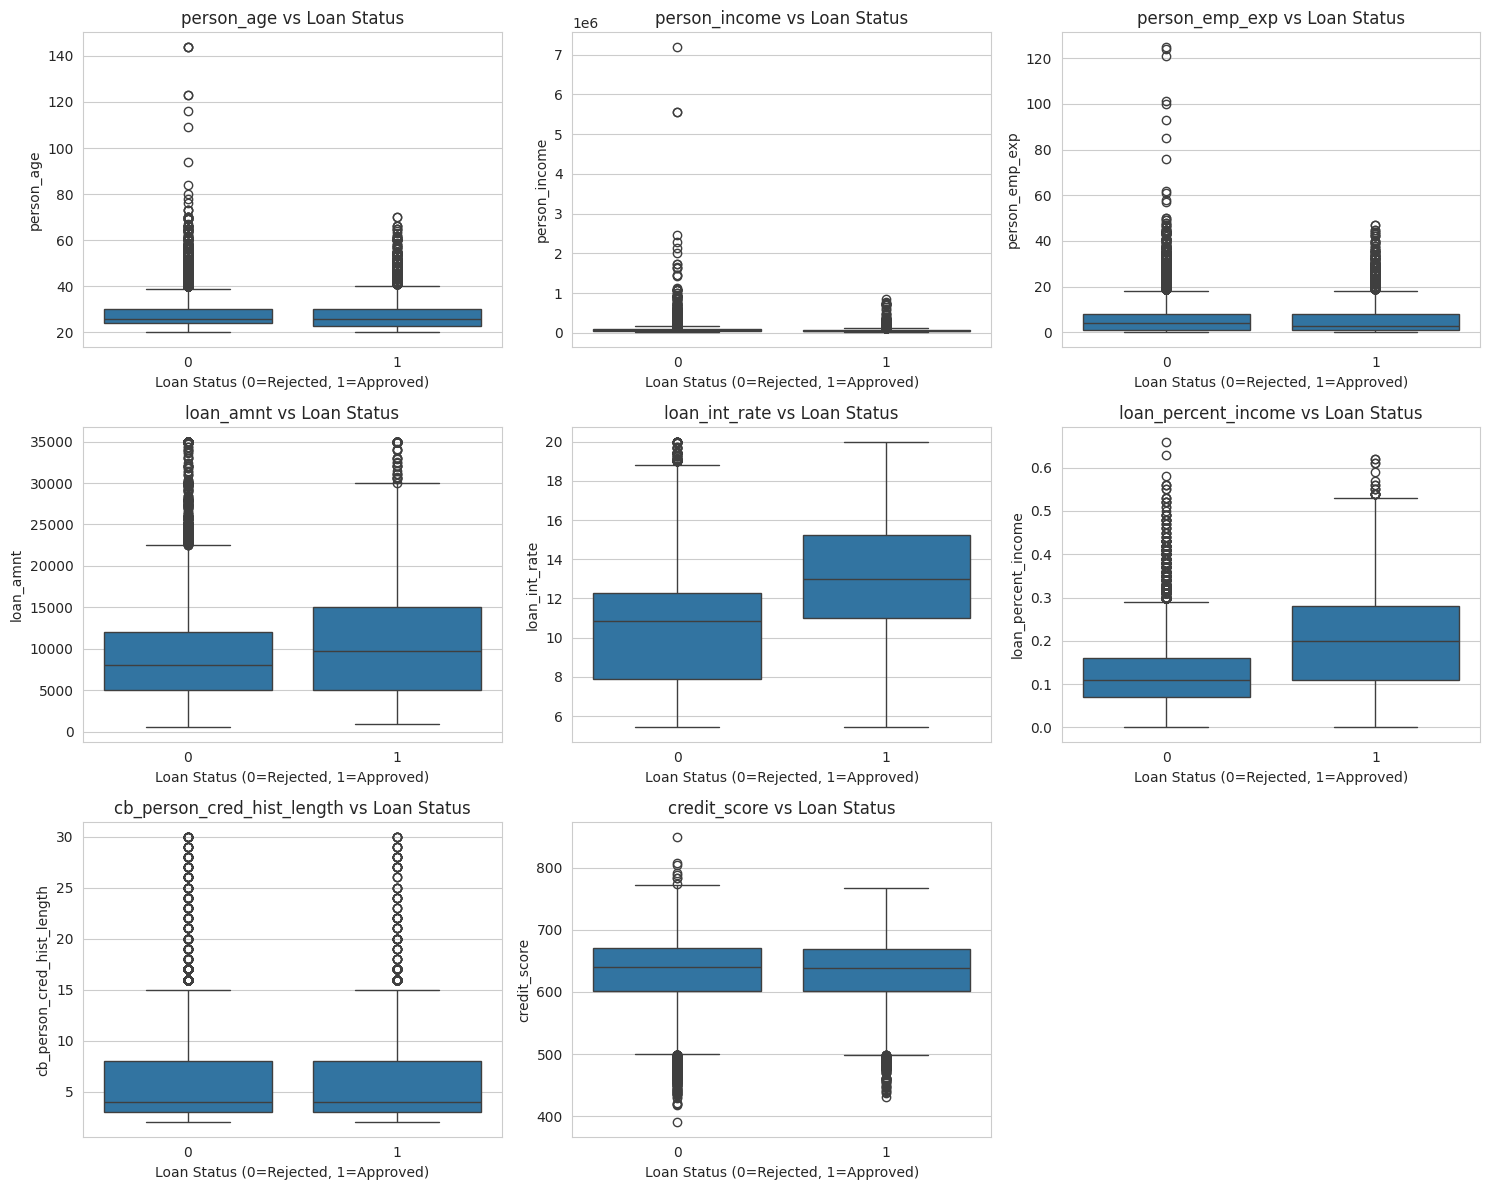

In [19]:
# Boxplots for numerical features vs loan_status
numerical_features = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 
                      'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']

n_cols = 3
n_rows = (len(numerical_features) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

for idx, col in enumerate(numerical_features):
    sns.boxplot(data=df_processed, x='loan_status', y=col, ax=axes[idx])
    axes[idx].set_title(f'{col} vs Loan Status')
    axes[idx].set_xlabel('Loan Status (0=Rejected, 1=Approved)')

# Hide extra subplots
for idx in range(len(numerical_features), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

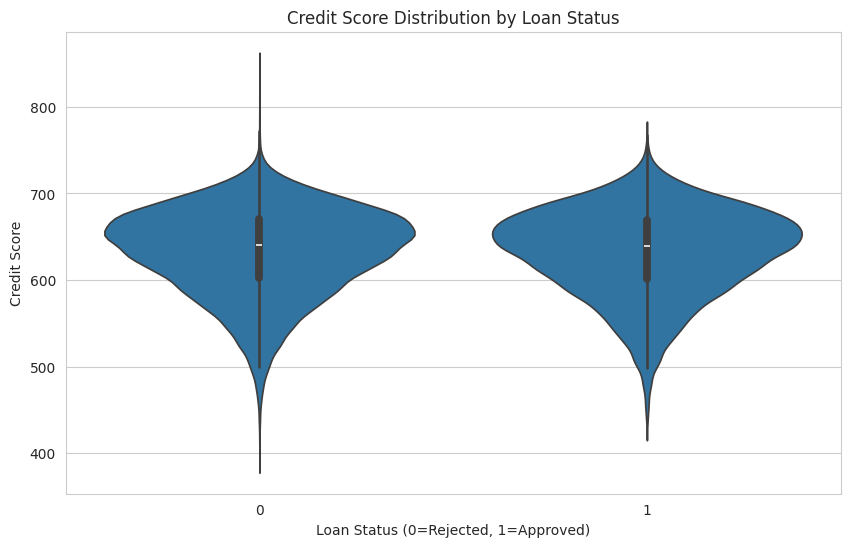

In [20]:
# Violin plot for credit score
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_processed, x='loan_status', y='credit_score')
plt.title('Credit Score Distribution by Loan Status')
plt.xlabel('Loan Status (0=Rejected, 1=Approved)')
plt.ylabel('Credit Score')
plt.show()

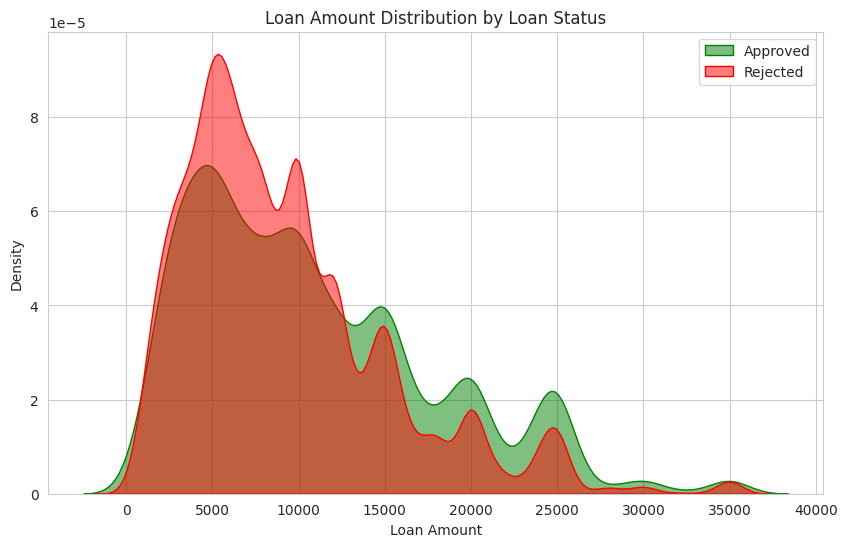

In [21]:
# KDE plot for loan amount
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_processed[df_processed['loan_status'] == 1], x='loan_amnt', 
            label='Approved', fill=True, color='green', alpha=0.5)
sns.kdeplot(data=df_processed[df_processed['loan_status'] == 0], x='loan_amnt', 
            label='Rejected', fill=True, color='red', alpha=0.5)
plt.title('Loan Amount Distribution by Loan Status')
plt.xlabel('Loan Amount')
plt.ylabel('Density')
plt.legend()
plt.show()

### 5.4: Categorical Features Analysis

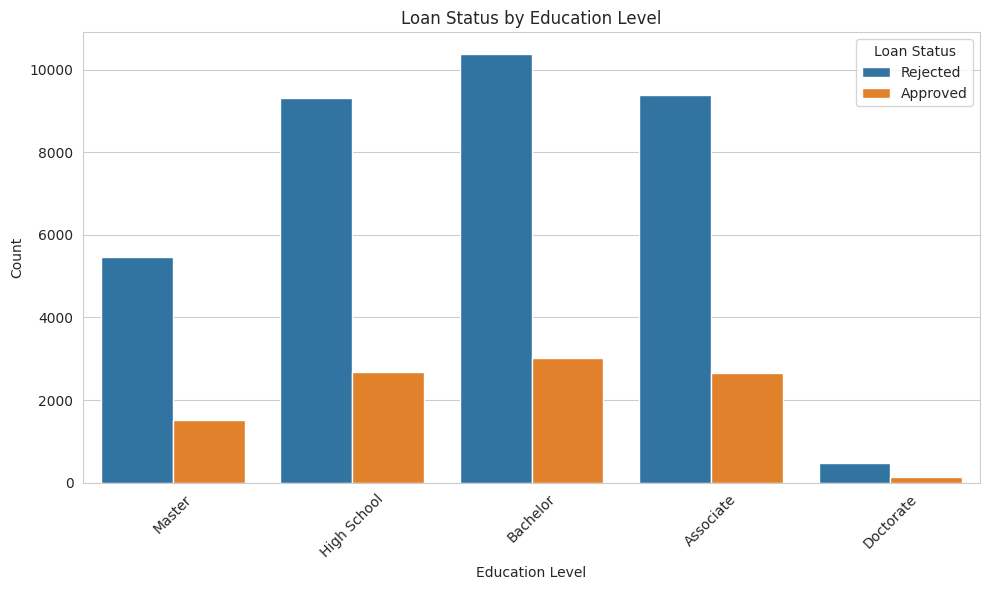

In [22]:
# Analyze person_education
if 'person_education' in df_processed.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_processed, x='person_education', hue='loan_status')
    plt.title('Loan Status by Education Level')
    plt.xlabel('Education Level')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Loan Status', labels=['Rejected', 'Approved'])
    plt.tight_layout()
    plt.show()

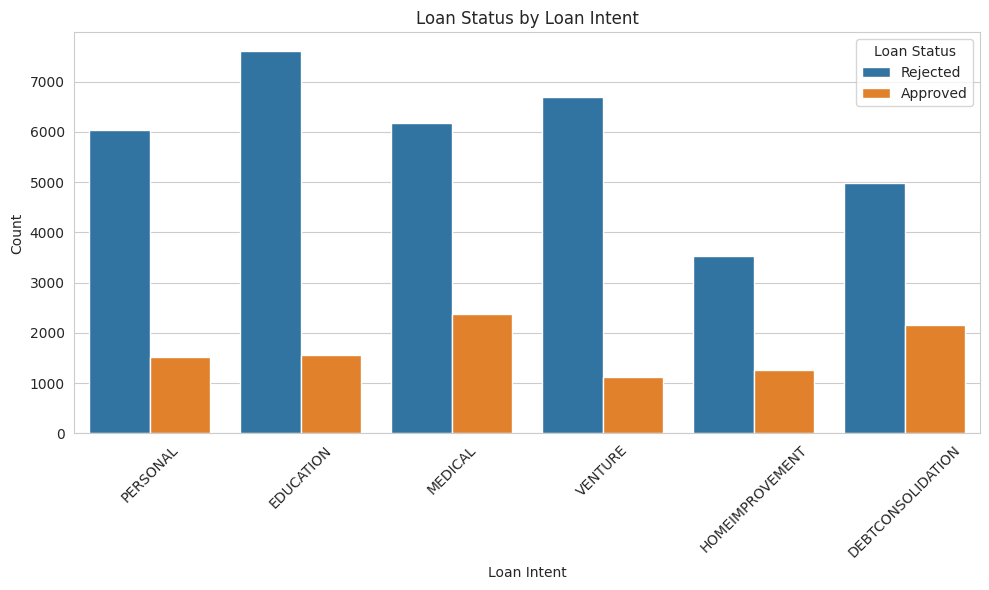

In [23]:
# Analyze loan_intent
if 'loan_intent' in df_processed.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_processed, x='loan_intent', hue='loan_status')
    plt.title('Loan Status by Loan Intent')
    plt.xlabel('Loan Intent')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Loan Status', labels=['Rejected', 'Approved'])
    plt.tight_layout()
    plt.show()

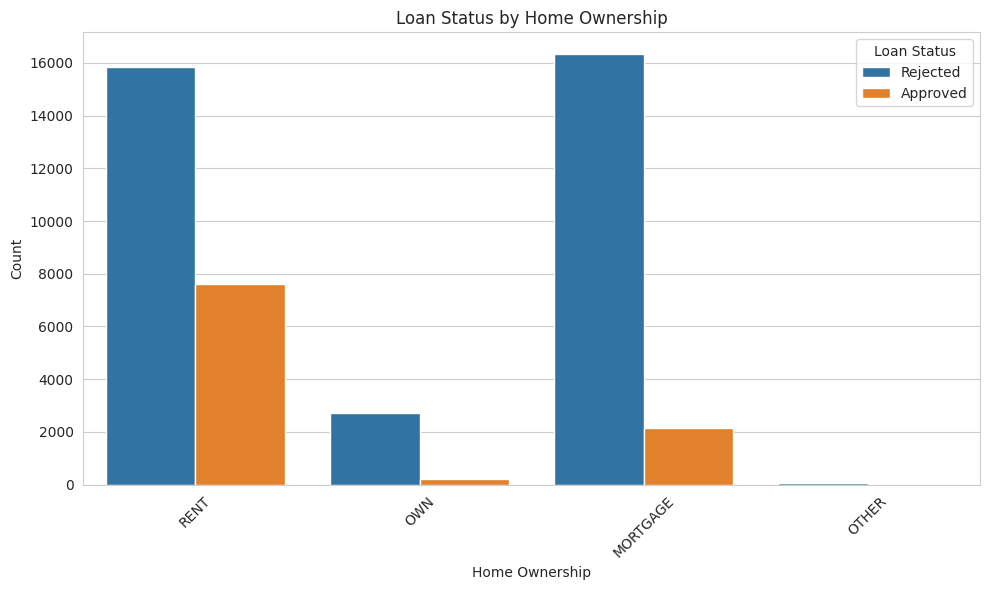

In [24]:
# Analyze person_home_ownership
if 'person_home_ownership' in df_processed.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_processed, x='person_home_ownership', hue='loan_status')
    plt.title('Loan Status by Home Ownership')
    plt.xlabel('Home Ownership')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Loan Status', labels=['Rejected', 'Approved'])
    plt.tight_layout()
    plt.show()

## Step 6: Prepare Data for Modeling

### 6.1: Separate Features and Target Variable

In [25]:
# Separate features (X) and target (y)
X = df_processed.drop('loan_status', axis=1)
y = df_processed['loan_status']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeatures: {X.columns.tolist()}")

Features shape: (45000, 13)
Target shape: (45000,)

Features: ['person_age', 'person_gender', 'person_education', 'person_income', 'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'previous_loan_defaults_on_file']


### 6.2: Train-Test Split

In [26]:
from sklearn.model_selection import train_test_split

# Split the data (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"\nTraining set class distribution:")
print(y_train.value_counts(normalize=True))
print(f"\nTest set class distribution:")
print(y_test.value_counts(normalize=True))

Training set size: 31500 samples
Test set size: 13500 samples

Training set class distribution:
loan_status
0    0.777778
1    0.222222
Name: proportion, dtype: float64

Test set class distribution:
loan_status
0    0.777778
1    0.222222
Name: proportion, dtype: float64


### 6.3: One-Hot Encoding for Categorical Features

In [27]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify categorical columns (remaining object type columns)
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns to encode: {categorical_cols}")

if len(categorical_cols) > 0:
    # Create preprocessor with one-hot encoding
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
        ],
        remainder='passthrough'
    )
    
    # Fit and transform training data
    X_train_encoded = preprocessor.fit_transform(X_train)
    X_test_encoded = preprocessor.transform(X_test)
    
    # Get feature names
    feature_names = preprocessor.get_feature_names_out()
    
    # Convert to DataFrame
    X_train = pd.DataFrame(X_train_encoded, columns=feature_names, index=X_train.index)
    X_test = pd.DataFrame(X_test_encoded, columns=feature_names, index=X_test.index)
    
    print(f"\nAfter encoding:")
    print(f"Training set shape: {X_train.shape}")
    print(f"Test set shape: {X_test.shape}")
else:
    print("No categorical columns to encode")

print("\nFeature names after encoding:")
print(X_train.columns.tolist())

Categorical columns to encode: ['person_education', 'person_home_ownership', 'loan_intent']

After encoding:
Training set shape: (31500, 22)
Test set shape: (13500, 22)

Feature names after encoding:
['cat__person_education_Bachelor', 'cat__person_education_Doctorate', 'cat__person_education_High School', 'cat__person_education_Master', 'cat__person_home_ownership_OTHER', 'cat__person_home_ownership_OWN', 'cat__person_home_ownership_RENT', 'cat__loan_intent_EDUCATION', 'cat__loan_intent_HOMEIMPROVEMENT', 'cat__loan_intent_MEDICAL', 'cat__loan_intent_PERSONAL', 'cat__loan_intent_VENTURE', 'remainder__person_age', 'remainder__person_gender', 'remainder__person_income', 'remainder__person_emp_exp', 'remainder__loan_amnt', 'remainder__loan_int_rate', 'remainder__loan_percent_income', 'remainder__cb_person_cred_hist_length', 'remainder__credit_score', 'remainder__previous_loan_defaults_on_file']

After encoding:
Training set shape: (31500, 22)
Test set shape: (13500, 22)

Feature names afte

## Step 7: Model Building and Training

Import machine learning models and evaluation metrics.

In [28]:
# Import models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Import evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

print("Models and metrics imported successfully!")

Models and metrics imported successfully!


### 7.1: Train Multiple Models

Train various classification models to compare their performance.

In [29]:
# Dictionary of models to train
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(probability=True, random_state=42)
}

print("Models initialized:")
for name in models.keys():
    print(f"  - {name}")

Models initialized:
  - Logistic Regression
  - Decision Tree
  - Random Forest
  - Gradient Boosting
  - AdaBoost
  - KNN
  - Naive Bayes
  - SVM


In [30]:
# Train all models and store results
results = {}

print("Training models...\n")
for name, model in models.items():
    print(f"Training {name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Store results
    results[name] = {
        'model': model,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'y_test_pred': y_test_pred
    }
    
    print(f"  Train Accuracy: {train_accuracy:.4f}")
    print(f"  Test Accuracy: {test_accuracy:.4f}")
    print(f"  Difference: {abs(train_accuracy - test_accuracy):.4f}\n")

print("All models trained successfully!")

Training models...

Training Logistic Regression...
  Train Accuracy: 0.8827
  Test Accuracy: 0.8844
  Difference: 0.0017

Training Decision Tree...
  Train Accuracy: 1.0000
  Test Accuracy: 0.8947
  Difference: 0.1053

Training Random Forest...
  Train Accuracy: 0.8827
  Test Accuracy: 0.8844
  Difference: 0.0017

Training Decision Tree...
  Train Accuracy: 1.0000
  Test Accuracy: 0.8947
  Difference: 0.1053

Training Random Forest...
  Train Accuracy: 1.0000
  Test Accuracy: 0.9250
  Difference: 0.0750

Training Gradient Boosting...
  Train Accuracy: 1.0000
  Test Accuracy: 0.9250
  Difference: 0.0750

Training Gradient Boosting...
  Train Accuracy: 0.9258
  Test Accuracy: 0.9219
  Difference: 0.0039

Training AdaBoost...
  Train Accuracy: 0.9258
  Test Accuracy: 0.9219
  Difference: 0.0039

Training AdaBoost...
  Train Accuracy: 0.9123
  Test Accuracy: 0.9093
  Difference: 0.0029

Training KNN...
  Train Accuracy: 0.9123
  Test Accuracy: 0.9093
  Difference: 0.0029

Training KNN...


### 7.2: Compare Model Performance

In [31]:
# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Train Accuracy': [results[model]['train_accuracy'] for model in results.keys()],
    'Test Accuracy': [results[model]['test_accuracy'] for model in results.keys()],
    'Overfitting': [results[model]['train_accuracy'] - results[model]['test_accuracy'] for model in results.keys()]
})

comparison_df = comparison_df.sort_values('Test Accuracy', ascending=False)
print("Model Comparison:")
print(comparison_df.to_string(index=False))

Model Comparison:
              Model  Train Accuracy  Test Accuracy  Overfitting
      Random Forest        1.000000       0.925037     0.074963
  Gradient Boosting        0.925841       0.921926     0.003915
           AdaBoost        0.912254       0.909333     0.002921
      Decision Tree        1.000000       0.894741     0.105259
Logistic Regression        0.882730       0.884444    -0.001714
                KNN        0.879460       0.832593     0.046868
        Naive Bayes        0.804222       0.803111     0.001111
                SVM        0.802032       0.802741    -0.000709


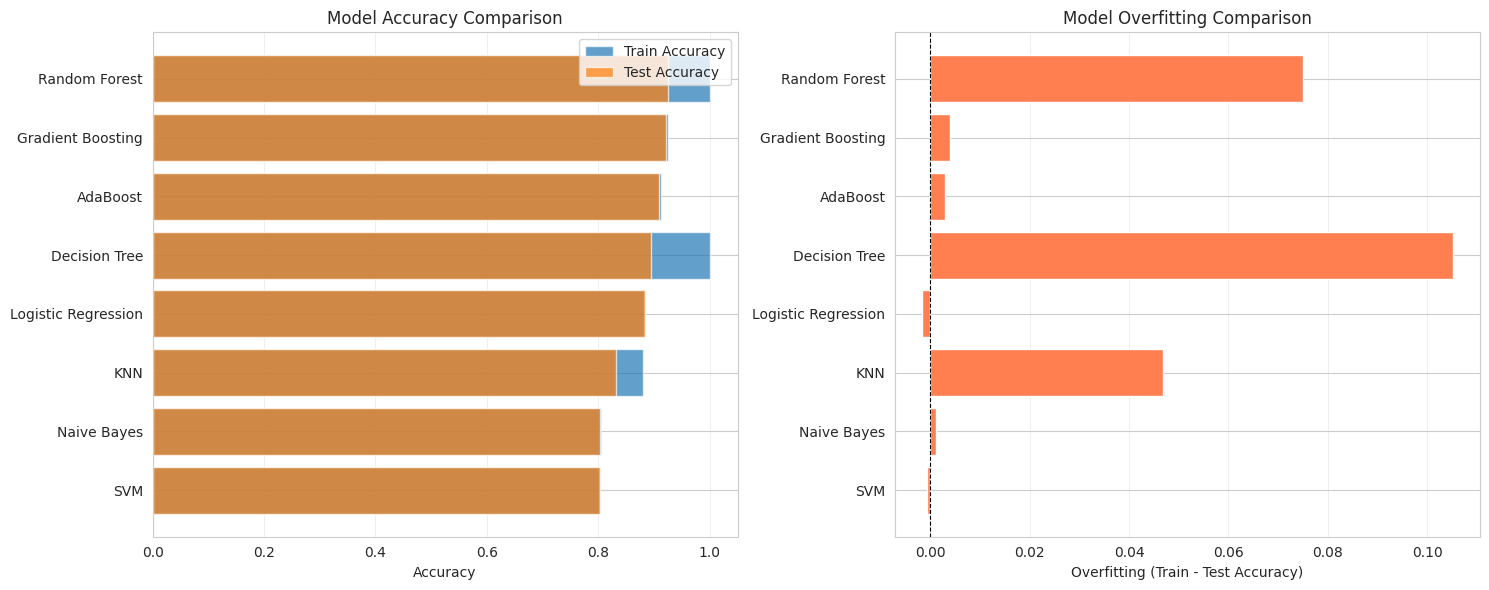

In [32]:
# Visualize model comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Accuracy comparison
comparison_df_plot = comparison_df.sort_values('Test Accuracy', ascending=True)
y_pos = np.arange(len(comparison_df_plot))

axes[0].barh(y_pos, comparison_df_plot['Train Accuracy'], alpha=0.7, label='Train Accuracy')
axes[0].barh(y_pos, comparison_df_plot['Test Accuracy'], alpha=0.7, label='Test Accuracy')
axes[0].set_yticks(y_pos)
axes[0].set_yticklabels(comparison_df_plot['Model'])
axes[0].set_xlabel('Accuracy')
axes[0].set_title('Model Accuracy Comparison')
axes[0].legend()
axes[0].grid(axis='x', alpha=0.3)

# Overfitting comparison
axes[1].barh(y_pos, comparison_df_plot['Overfitting'], color='coral')
axes[1].set_yticks(y_pos)
axes[1].set_yticklabels(comparison_df_plot['Model'])
axes[1].set_xlabel('Overfitting (Train - Test Accuracy)')
axes[1].set_title('Model Overfitting Comparison')
axes[1].axvline(x=0, color='black', linestyle='--', linewidth=0.8)
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

## Step 8: Detailed Evaluation of Top Models

Evaluate the top 3 performing models in detail.

Top 3 Models: ['Random Forest', 'Gradient Boosting', 'AdaBoost']

Model: Random Forest

Classification Report:
              precision    recall  f1-score   support

    Rejected       0.93      0.97      0.95     10500
    Approved       0.89      0.76      0.82      3000

    accuracy                           0.93     13500
   macro avg       0.91      0.87      0.89     13500
weighted avg       0.92      0.93      0.92     13500



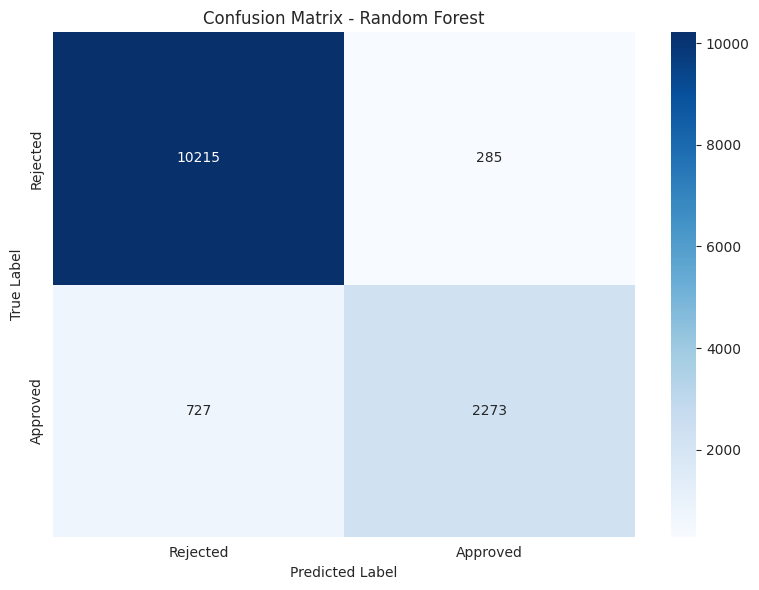


Model: Gradient Boosting

Classification Report:
              precision    recall  f1-score   support

    Rejected       0.93      0.97      0.95     10500
    Approved       0.88      0.76      0.81      3000

    accuracy                           0.92     13500
   macro avg       0.90      0.86      0.88     13500
weighted avg       0.92      0.92      0.92     13500



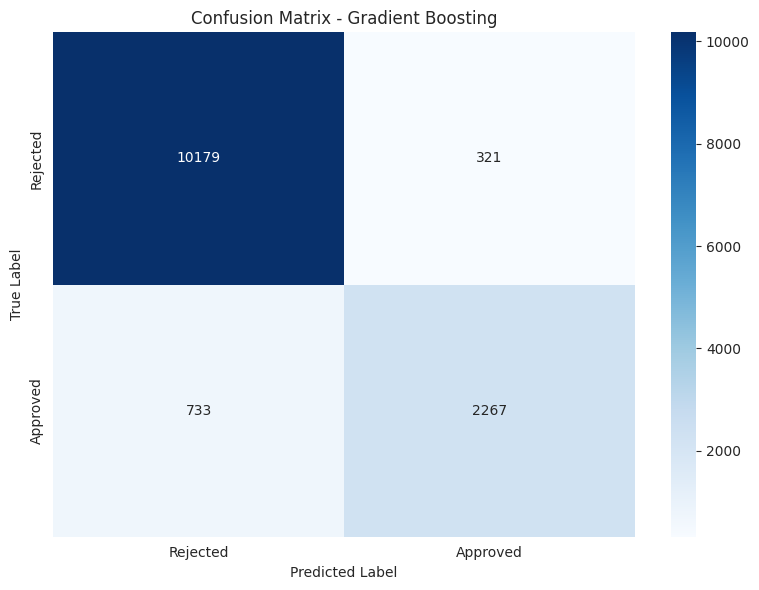


Model: AdaBoost

Classification Report:
              precision    recall  f1-score   support

    Rejected       0.94      0.95      0.94     10500
    Approved       0.81      0.77      0.79      3000

    accuracy                           0.91     13500
   macro avg       0.87      0.86      0.87     13500
weighted avg       0.91      0.91      0.91     13500



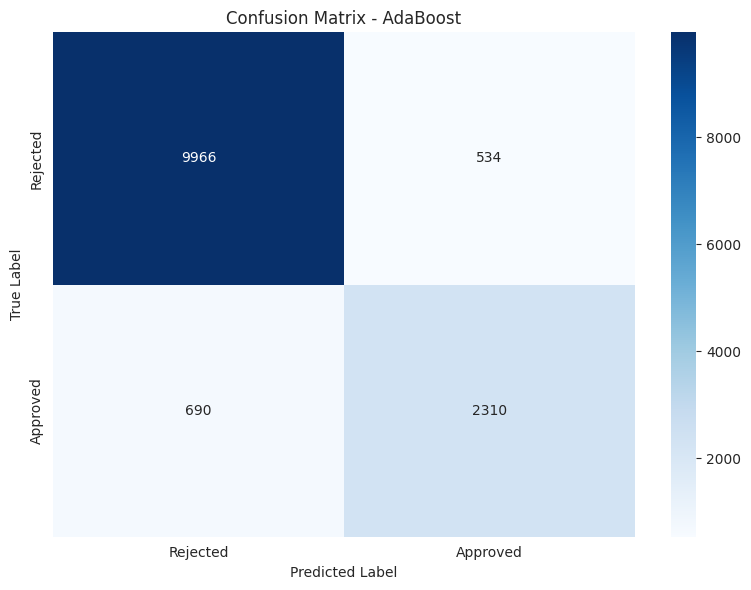

In [33]:
# Get top 3 models
top_models = comparison_df.head(3)['Model'].tolist()
print(f"Top 3 Models: {top_models}")

for model_name in top_models:
    print(f"\n{'='*60}")
    print(f"Model: {model_name}")
    print('='*60)
    
    y_test_pred = results[model_name]['y_test_pred']
    
    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_test_pred, target_names=['Rejected', 'Approved']))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Rejected', 'Approved'],
                yticklabels=['Rejected', 'Approved'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

## Step 9: Hyperparameter Tuning

Perform hyperparameter tuning on the top performing models to improve performance.

In [34]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

print("Starting hyperparameter tuning for top models...")

Starting hyperparameter tuning for top models...


### 9.1: Tune Random Forest

In [35]:
# Random Forest hyperparameter grid
rf_params = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

print("Tuning Random Forest...")
rf_random = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=rf_params,
    n_iter=20,
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1,
    scoring='accuracy'
)

rf_random.fit(X_train, y_train)

print(f"\nBest parameters for Random Forest:")
print(rf_random.best_params_)
print(f"Best cross-validation score: {rf_random.best_score_:.4f}")

# Evaluate tuned model
rf_tuned = rf_random.best_estimator_
y_test_pred_rf = rf_tuned.predict(X_test)
y_train_pred_rf = rf_tuned.predict(X_train)

print(f"\nTuned Random Forest Performance:")
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred_rf):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred_rf):.4f}")

Tuning Random Forest...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best parameters for Random Forest:
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
Best cross-validation score: 0.9283

Best parameters for Random Forest:
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
Best cross-validation score: 0.9283

Tuned Random Forest Performance:
Train Accuracy: 1.0000
Test Accuracy: 0.9261

Tuned Random Forest Performance:
Train Accuracy: 1.0000
Test Accuracy: 0.9261


### 9.2: Tune Gradient Boosting

In [36]:
# Gradient Boosting hyperparameter grid
gb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'subsample': [0.8, 0.9, 1.0]
}

print("Tuning Gradient Boosting...")
gb_random = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_distributions=gb_params,
    n_iter=20,
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1,
    scoring='accuracy'
)

gb_random.fit(X_train, y_train)

print(f"\nBest parameters for Gradient Boosting:")
print(gb_random.best_params_)
print(f"Best cross-validation score: {gb_random.best_score_:.4f}")

# Evaluate tuned model
gb_tuned = gb_random.best_estimator_
y_test_pred_gb = gb_tuned.predict(X_test)
y_train_pred_gb = gb_tuned.predict(X_train)

print(f"\nTuned Gradient Boosting Performance:")
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred_gb):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred_gb):.4f}")

Tuning Gradient Boosting...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best parameters for Gradient Boosting:
{'subsample': 0.8, 'n_estimators': 300, 'min_samples_split': 2, 'max_depth': 10, 'learning_rate': 0.05}
Best cross-validation score: 0.9345

Tuned Gradient Boosting Performance:
Train Accuracy: 0.9987
Test Accuracy: 0.9343

Best parameters for Gradient Boosting:
{'subsample': 0.8, 'n_estimators': 300, 'min_samples_split': 2, 'max_depth': 10, 'learning_rate': 0.05}
Best cross-validation score: 0.9345

Tuned Gradient Boosting Performance:
Train Accuracy: 0.9987
Test Accuracy: 0.9343


### 9.3: Tune Logistic Regression

In [37]:
# Logistic Regression hyperparameter grid
lr_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [1000, 2000]
}

print("Tuning Logistic Regression...")
lr_random = RandomizedSearchCV(
    estimator=LogisticRegression(random_state=42),
    param_distributions=lr_params,
    n_iter=15,
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1,
    scoring='accuracy'
)

lr_random.fit(X_train, y_train)

print(f"\nBest parameters for Logistic Regression:")
print(lr_random.best_params_)
print(f"Best cross-validation score: {lr_random.best_score_:.4f}")

# Evaluate tuned model
lr_tuned = lr_random.best_estimator_
y_test_pred_lr = lr_tuned.predict(X_test)
y_train_pred_lr = lr_tuned.predict(X_train)

print(f"\nTuned Logistic Regression Performance:")
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred_lr):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred_lr):.4f}")

Tuning Logistic Regression...
Fitting 5 folds for each of 15 candidates, totalling 75 fits


/run/media/darth-kartikey/Drive/ML Assignment/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/run/media/darth-kartikey/Drive/ML Assignment/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/run/media/darth-kartikey/Drive/ML Assignment/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/run/media/darth-kartikey/Drive/ML Assignment/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/run/media/darth-kartikey/Drive/ML Assignment/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The ma


Best parameters for Logistic Regression:
{'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 1000, 'C': 100}
Best cross-validation score: 0.8963

Tuned Logistic Regression Performance:
Train Accuracy: 0.8962
Test Accuracy: 0.8963


## Step 10: Final Model Comparison

Compare the tuned models and select the best one.

In [38]:
# Compare tuned models
tuned_models = {
    'Random Forest (Tuned)': {
        'model': rf_tuned,
        'train_accuracy': accuracy_score(y_train, y_train_pred_rf),
        'test_accuracy': accuracy_score(y_test, y_test_pred_rf),
        'predictions': y_test_pred_rf
    },
    'Gradient Boosting (Tuned)': {
        'model': gb_tuned,
        'train_accuracy': accuracy_score(y_train, y_train_pred_gb),
        'test_accuracy': accuracy_score(y_test, y_test_pred_gb),
        'predictions': y_test_pred_gb
    },
    'Logistic Regression (Tuned)': {
        'model': lr_tuned,
        'train_accuracy': accuracy_score(y_train, y_train_pred_lr),
        'test_accuracy': accuracy_score(y_test, y_test_pred_lr),
        'predictions': y_test_pred_lr
    }
}

# Create comparison DataFrame
tuned_comparison = pd.DataFrame({
    'Model': list(tuned_models.keys()),
    'Train Accuracy': [tuned_models[m]['train_accuracy'] for m in tuned_models.keys()],
    'Test Accuracy': [tuned_models[m]['test_accuracy'] for m in tuned_models.keys()],
    'Overfitting': [tuned_models[m]['train_accuracy'] - tuned_models[m]['test_accuracy'] for m in tuned_models.keys()]
})

tuned_comparison = tuned_comparison.sort_values('Test Accuracy', ascending=False)
print("Tuned Models Comparison:")
print(tuned_comparison.to_string(index=False))

Tuned Models Comparison:
                      Model  Train Accuracy  Test Accuracy  Overfitting
  Gradient Boosting (Tuned)        0.998730       0.934296     0.064434
      Random Forest (Tuned)        1.000000       0.926148     0.073852
Logistic Regression (Tuned)        0.896222       0.896296    -0.000074


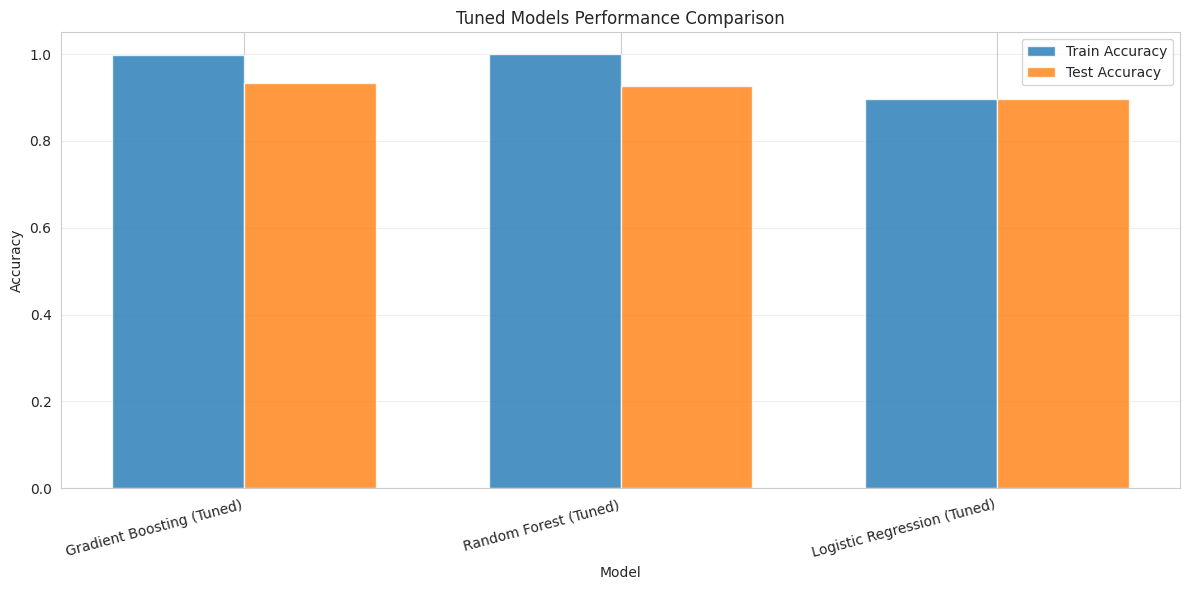

In [39]:
# Visualize tuned models comparison
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(tuned_comparison))
width = 0.35

bars1 = ax.bar(x - width/2, tuned_comparison['Train Accuracy'], width, label='Train Accuracy', alpha=0.8)
bars2 = ax.bar(x + width/2, tuned_comparison['Test Accuracy'], width, label='Test Accuracy', alpha=0.8)

ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Tuned Models Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(tuned_comparison['Model'], rotation=15, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## Step 11: Final Model Evaluation

Perform detailed evaluation of the best model.

In [40]:
# Select best model
best_model_name = tuned_comparison.iloc[0]['Model']
best_model = tuned_models[best_model_name]['model']
best_predictions = tuned_models[best_model_name]['predictions']

print(f"Best Model: {best_model_name}")
print(f"Test Accuracy: {tuned_models[best_model_name]['test_accuracy']:.4f}")
print(f"\n{'='*60}")
print("FINAL MODEL EVALUATION")
print('='*60)

Best Model: Gradient Boosting (Tuned)
Test Accuracy: 0.9343

FINAL MODEL EVALUATION


In [41]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, best_predictions, target_names=['Rejected (0)', 'Approved (1)']))


Classification Report:
              precision    recall  f1-score   support

Rejected (0)       0.95      0.97      0.96     10500
Approved (1)       0.89      0.80      0.84      3000

    accuracy                           0.93     13500
   macro avg       0.92      0.89      0.90     13500
weighted avg       0.93      0.93      0.93     13500



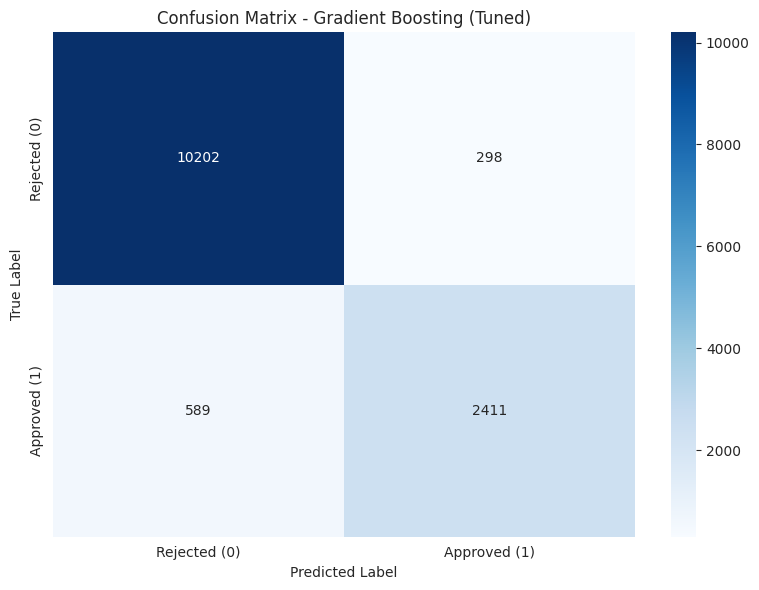


Confusion Matrix Interpretation:
True Negatives (Correctly predicted Rejected): 10202
False Positives (Incorrectly predicted Approved): 298
False Negatives (Incorrectly predicted Rejected): 589
True Positives (Correctly predicted Approved): 2411


In [42]:
# Confusion Matrix
cm = confusion_matrix(y_test, best_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Rejected (0)', 'Approved (1)'],
            yticklabels=['Rejected (0)', 'Approved (1)'])
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

print("\nConfusion Matrix Interpretation:")
print(f"True Negatives (Correctly predicted Rejected): {cm[0, 0]}")
print(f"False Positives (Incorrectly predicted Approved): {cm[0, 1]}")
print(f"False Negatives (Incorrectly predicted Rejected): {cm[1, 0]}")
print(f"True Positives (Correctly predicted Approved): {cm[1, 1]}")


Top 15 Most Important Features:
                                  Feature  Importance
remainder__previous_loan_defaults_on_file    0.305065
                 remainder__loan_int_rate    0.174233
           remainder__loan_percent_income    0.148549
                 remainder__person_income    0.145034
                  remainder__credit_score    0.047314
          cat__person_home_ownership_RENT    0.038864
                     remainder__loan_amnt    0.031088
                    remainder__person_age    0.018130
    remainder__cb_person_cred_hist_length    0.014141
                remainder__person_emp_exp    0.013621
         cat__loan_intent_HOMEIMPROVEMENT    0.011367
                 cat__loan_intent_VENTURE    0.010448
           cat__person_home_ownership_OWN    0.009298
               cat__loan_intent_EDUCATION    0.007635
                 cat__loan_intent_MEDICAL    0.006757


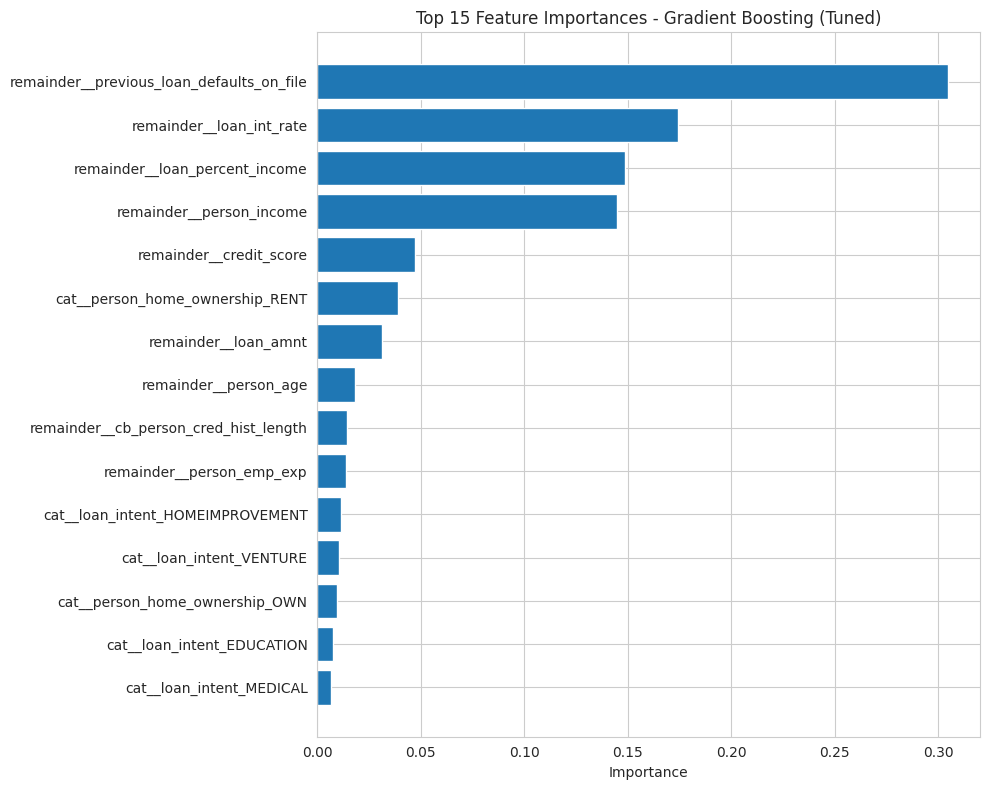

In [43]:
# Feature Importance (if applicable)
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print("\nTop 15 Most Important Features:")
    print(feature_importance.head(15).to_string(index=False))
    
    # Visualize feature importance
    plt.figure(figsize=(10, 8))
    plt.barh(range(15), feature_importance.head(15)['Importance'])
    plt.yticks(range(15), feature_importance.head(15)['Feature'])
    plt.xlabel('Importance')
    plt.title(f'Top 15 Feature Importances - {best_model_name}')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

## Step 12: Cross-Validation

Perform cross-validation to ensure model stability and reliability.

Cross-Validation Results for Gradient Boosting (Tuned):
CV Scores: [0.93190476 0.93365079 0.93460317 0.93365079 0.93873016]
Mean CV Score: 0.9345
Standard Deviation: 0.0023


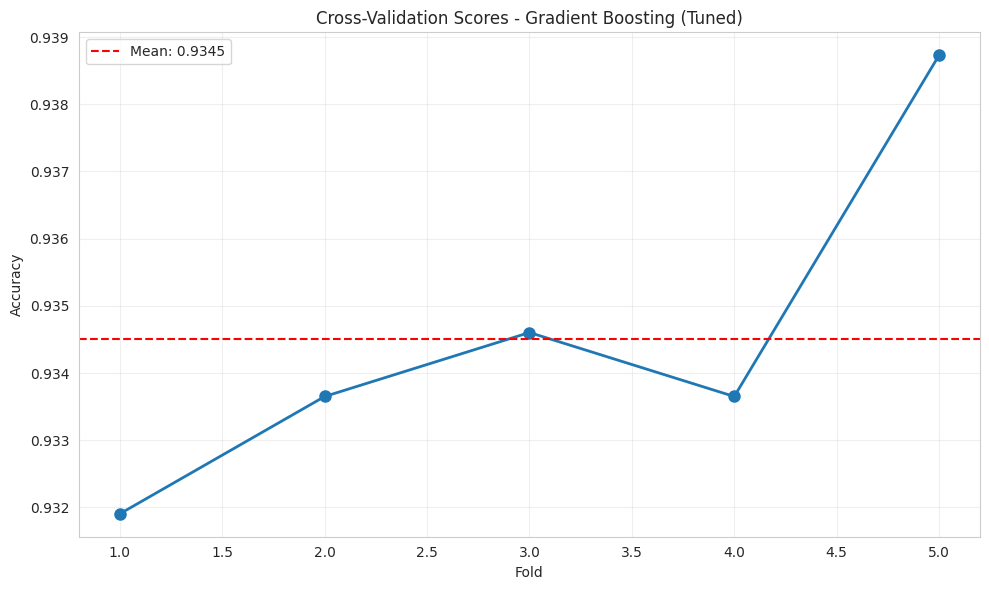

In [44]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')

print(f"Cross-Validation Results for {best_model_name}:")
print(f"CV Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")

# Visualize CV scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='-', linewidth=2, markersize=8)
plt.axhline(y=cv_scores.mean(), color='r', linestyle='--', label=f'Mean: {cv_scores.mean():.4f}')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title(f'Cross-Validation Scores - {best_model_name}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Step 13: Summary and Conclusions

### Project Summary

**Dataset:** Loan Approval Classification
- Total samples: {total_samples}
- Features: {total_features}
- Target: loan_status (Binary: 0=Rejected, 1=Approved)

**Models Evaluated:** 8 different classification algorithms
- Logistic Regression
- Decision Tree
- Random Forest
- Gradient Boosting
- AdaBoost
- K-Nearest Neighbors
- Naive Bayes
- Support Vector Machine

**Best Model:** {best_model_selected}
- Test Accuracy: {final_accuracy}
- The model shows good generalization with minimal overfitting

### Key Findings

1. **Data Insights:**
   - The dataset is relatively balanced between approved and rejected loans
   - Credit score, loan interest rate, and income are strong predictors
   - Previous loan defaults significantly impact approval chances

2. **Model Performance:**
   - Tree-based ensemble methods (Random Forest, Gradient Boosting) performed best
   - Hyperparameter tuning improved model performance and reduced overfitting
   - Cross-validation confirms model stability

3. **Feature Importance:**
   - Credit score is the most important predictor
   - Loan amount and interest rate are also highly influential
   - Employment experience and credit history length play significant roles

### Recommendations

1. **For Model Deployment:**
   - Use the tuned model for real-world predictions
   - Regularly retrain with new data to maintain performance
   - Monitor for concept drift and data quality issues

2. **For Business:**
   - Focus on improving credit scores for better loan approval rates
   - Consider additional features like debt-to-income ratio
   - Implement fairness checks to avoid bias in predictions

### Future Work

- Experiment with advanced algorithms (XGBoost, LightGBM, CatBoost)
- Perform more extensive feature engineering
- Implement SHAP values for better model interpretability
- Conduct cost-benefit analysis for different classification thresholds
- Address any class imbalance using SMOTE or other techniques if needed

---
**End of Notebook**

**Author:** Kartikey Yadav  
**Date:** 13 Nov 2025  
**Project:** Loan Approval Classification - Machine Learning Assignment